In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.3, rc={"figure.figsize": (2.5, 0.5)})

%matplotlib inline

In [2]:
power = pd.read_json("/media/jsaxon/brobdingnag/data/c4_redux/nc_power_race.json", lines = True)
power["method"] = "Power Diagrams"

polsby = pd.read_json("/media/jsaxon/brobdingnag/data/c4_redux/nc_polsby_race.json", lines = True)
polsby["method"] = "Isoperimeter Quotient"

df = pd.concat([power, polsby], axis = 0, sort = False).reset_index(drop = True)

df = df[df.DemSeats > 3]

/home/jsaxon/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])


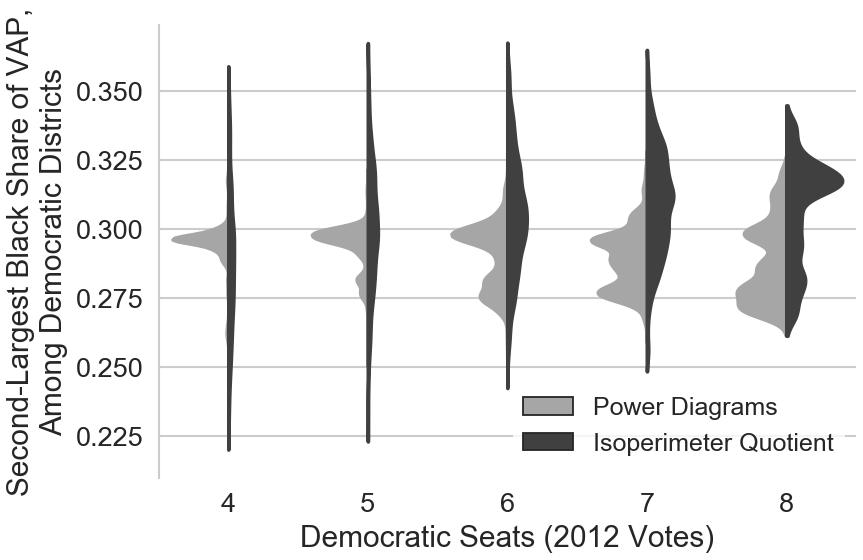

In [3]:
ax = sns.violinplot(data = df, x = "DemSeats", y = "BlackShare2", hue = "method", 
                    inner = None, split = True, bw = 0.2,
                    palette={"Power Diagrams": "0.65", 
                             "Isoperimeter Quotient": "0.25"})

ax.set_xlabel("Democratic Seats (2012 Votes)")
ax.set_ylabel("Second-Largest Black Share of VAP,\nAmong Democratic Districts")
ax.set_ylim(0.21, 0.374)

sns.despine(top = True, bottom = True, right = True)

l = ax.legend(loc='lower right', frameon = True, fontsize = 12)
l.set_title("")
l.get_frame().set_facecolor("white")
l.get_frame().set_edgecolor("white")

ax.figure.savefig("nc_dseats_black_shares.pdf")

In [4]:
df[(df.method == "Power Diagrams") & (df.BlackShare2 > 0.29)].DemSeats.mean() # hist(bins = np.arange(3, 9))

5.556851790995728

In [5]:
df[(df.method == "Power Diagrams") & (df.BlackShare2 > 0.31)].DemSeats.mean() # hist(bins = np.arange(3, 9))

6.052631578947368

In [6]:
power["Black"] = (df.BlackShare2 > 0.32).astype(int)
power.groupby("DemSeats").Black.mean()

DemSeats
3         NaN
4    0.000000
5    0.000000
6    0.000284
7    0.005373
8    0.020270
Name: Black, dtype: float64

In [7]:
df[(df.method == "Isoperimeter Quotient") & (df.BlackShare2 > 0.34)].DemSeats.mean() # hist(bins = np.arange(3, 9))

5.740259740259741

In [8]:
power.corr()

,BlackShare1,BlackShare2,DemSeats,Black
BlackShare1,1.000000,-0.409012,0.021195,-0.040769
BlackShare2,-0.409012,1.000000,-0.202928,0.105954
DemSeats,0.021195,-0.202928,1.000000,0.063270
Black,-0.040769,0.105954,0.063270,1.000000


In [9]:
polsby.corr()

,BlackShare1,BlackShare2,DemSeats
BlackShare1,1.000000,-0.013442,0.005378
BlackShare2,-0.013442,1.000000,0.275891
DemSeats,0.005378,0.275891,1.000000
